In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('lab2_cleaned_df.csv')

In [3]:
# modules for linear regression
from sklearn.linear_model import LinearRegression

In [4]:
# create linear regression object
lm = LinearRegression()
lm

LinearRegression()

In [5]:
# predict price using 'highway-mpg' as independent variables
X = df[['highway-mpg']]
Y = df['price']

In [6]:
# fit the model
lm.fit(X,Y)

LinearRegression()

In [7]:
Yhat = lm.predict(X)
Yhat[0:5]

array([16254.26934067, 17077.0977727 , 13785.78404458, 20368.41150083,
       17899.92620473])

In [8]:
lm.intercept_

38470.63700549667

In [9]:
lm.coef_

array([-822.82843203])

<h1>Estimated linear model</h1>
<b>Price</b> = 38470 - 822.82 * <b>higway-mpg</b>

In [10]:
lm1 = LinearRegression()

In [11]:
lm1.fit(df[['engine-size']],df[['price']])

LinearRegression()

In [12]:
lm1.coef_

array([[166.8621392]])

In [13]:
lm1.intercept_

array([-7962.44097916])

In [15]:
Yhat = -7962+166.86*X
Price = -7962 +166.86 * df['engine-size']

<h1>Multiple Linear Regression </h1>

In [16]:
Z = df[['horsepower','curb-weight','engine-size','highway-mpg']]

In [17]:
lm.fit(Z,df['price'])

LinearRegression()

In [18]:
lm.intercept_

-15814.439139011303

In [19]:
lm.coef_

array([53.64350321,  4.70621169, 81.46397065, 36.26760488])

<b>Price</b> = -15678.742628 + 52.65851272 X <b>horsepower</b> + 4.7062 X <b>curb-weight</b> + 81.959062 X <b>engine-size</b> + 33.5825815 X <b> highway-mpg </b>

In [20]:
lm2 = LinearRegression()

In [24]:
lm2.fit(df[['normalized-losses','highway-mpg']],df['price'])
lm2

LinearRegression()

In [25]:
lm2.coef_

array([   1.45409594, -821.58496582])

In [26]:
lm2.intercept_

38255.05667129212

<h1>Model Evaluation using visualization</h1>

In [27]:
import seaborn as sns
%matplotlib inline

(0.0, 48156.22059637623)

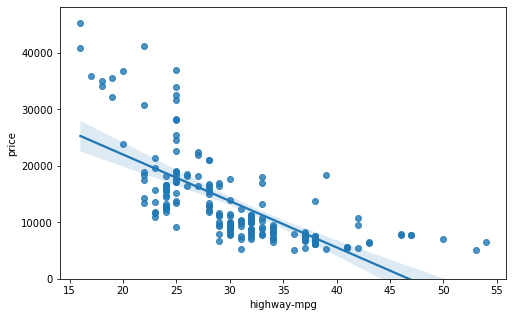

In [31]:
width = 8
height = 5
plt.figure(figsize=(width,height))
sns.regplot(x="highway-mpg",y="price",data=df)
plt.ylim(0,)

(0.0, 47414.1)

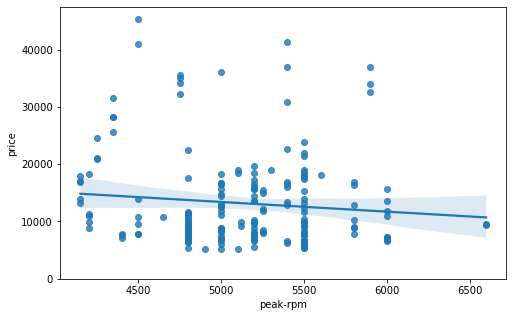

In [38]:
plt.figure(figsize=(8,5))
sns.regplot(x='peak-rpm',y='price',data=df)
plt.ylim(0,)

C:\Users\adabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


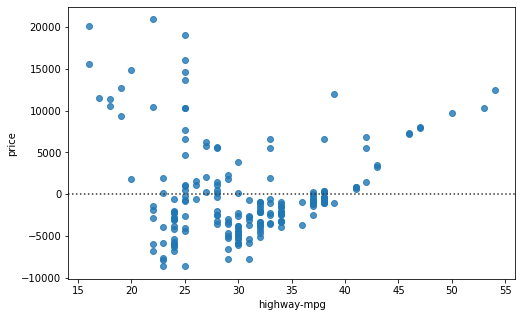

In [39]:
# observe residual
plt.figure(figsize=(8,5))
sns.residplot(df['highway-mpg'],df['price'])
plt.show()

In [40]:
Y_hat = lm.predict(Z)

C:\Users\adabh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\adabh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


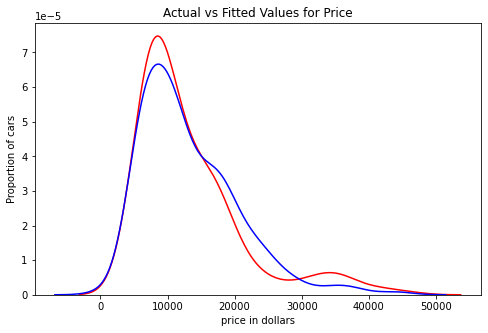

In [43]:
plt.figure(figsize=(width,height))

ax1 = sns.distplot(df['price'],hist=False,color="r",label="Actual Value")
sns.distplot(Y_hat, hist=False,color='b', label="Fitted Values",ax=ax1)

plt.title("Actual vs Fitted Values for Price")
plt.xlabel('price in dollars')
plt.ylabel('Proportion of cars')

plt.show()

            11             10             9           8         7
-1.273e-08 x  + 4.839e-06 x  - 0.0008229 x + 0.08259 x - 5.432 x
          6        5             4             3            2
 + 245.6 x - 7786 x + 1.729e+05 x - 2.634e+06 x + 2.62e+07 x - 1.532e+08 x + 3.987e+08


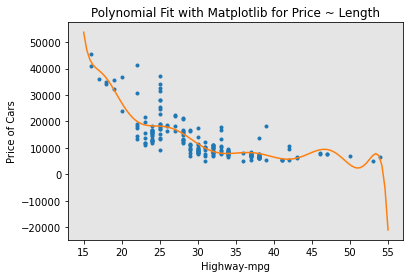

In [47]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

# polynomial regression
x = df['highway-mpg']
y = df['price']
f1 = np.polyfit(x,y,11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y,'Highway-mpg')